# YOUR PROJECT TITLE

Imports and set magics:

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
import statsmodels.api as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject
from dataproject import NyboligScraper
from dataproject import NyboligAnalysis


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Scraping data

First we need to scrape the data from the internet. The data is scraped from https://www.nybolig.dk/. To know how many pages is possible to scrape you can call the get_pages function of the following property types:

**All**: ''
**Andelsbolig**: 'andelsbolig'
**Ejerlejlighed**: 'ejerlejlighed'
**Sommerhusgrunde**: 'fritidsgrund'
**Grunde**: 'helaarsgrund'
**Hus**: 'hus'
**Landejendomme**: 'landejendom'
**Rækkehuse**:  'raekkehus'
**Sommerhuse**: 'sommerhus'
**Villalejligheder**:   'villalejlighed'


The number of pages that you choose will determine the size of the dataset.

In [276]:
scraper = NyboligScraper()
scraper.get_pages(property_type='sommerhus')


Total number of pages: 212


Next, we need to identify what property types and how many pages we want to work with. To do this you can call the scraper.scrape_data_nybolig(self, num_pages, property_type=None, file_name=None) function. This will save the desired data into a CSV file that we will be able to work with.

In [277]:
scraper.scrape_data_nybolig(num_pages=200, property_type='sommerhus', file_name='dataprojekt_data')

# Accessing Data

Now that we have created the dataset we need to access it. To do this please provide the path of this dictionary with the filename.

In [278]:
file_path = 'dataprojekt_data.csv'
data = pd.read_csv('dataprojekt_data.csv')

print(data.head())



                                    address  postcode        city    price  \
0              Vandflodvej 25, 6857 Blåvand    6857.0     Blåvand  3395000   
1  Drejet 36D, Spodsbj Drej, 5900 Rudkøbing    5900.0   Rudkøbing  1845000   
2  Marielyst Strandpark 46, 4873 Væggerløse    4873.0  Væggerløse  1995000   
3                     Dillet 7, 4874 Gedser    4874.0      Gedser  1775000   
4             Hjelmvej 13, Elsegårde Strand       NaN      Strand  1298000   

           type  rooms  size_1  size_2  
0  Fritidsbolig      5     178     NaN  
1  Fritidsbolig      4      83     NaN  
2  Fritidsbolig      5     115     NaN  
3  Fritidsbolig      4      85     NaN  
4  Fritidsbolig      3      40     NaN  


# Analysis

In [279]:
analysis = NyboligAnalysis(file_path)

To make the analysis more accurate we need to remove outliers from the dataset. We can do this by using the remove_outliers functions from the NyboligAnalysis class. The remove_outliers() function takes two arguments: column_name and threshold. column_name specifies the name of the column that we want to remove outliers from, and threshold specifies the number of standard deviations above or below the mean that we want to consider as outliers.

In [280]:
analysis.remove_outliers('rooms', 15)
analysis.remove_outliers('size_1', 7)

**Descriptive statistics**

Change the list (lst) to perform descriptive statistics on variables of your choosing

In [281]:
lst = ['price', 'rooms', 'size_1']

for i in lst:
    info = analysis.descriptive_statistics(i)
    print(info)
    print()


       count          mean           std     min        25%        50%  \
price   4099  2.329591e+06  2.099168e+06  520000  1250000.0  1795000.0   

             75%       max  
price  2696500.0  32500000  

       count      mean       std  min  25%  50%  75%  max
rooms   4099  3.919005  1.263397    0  3.0  4.0  4.0   14

        count       mean        std  min   25%   50%    75%  max
size_1   4099  91.014394  40.756224    9  64.0  82.0  108.0  401



In [282]:
# Define the independent and dependent variables
X = analysis.data[['size_1', 'rooms']]
y = analysis.data['price']

# Fit the OLS model and print the summary
summary = analysis.OLS(X, y)
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     582.5
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          2.24e-223
Time:                        17:10:44   Log-Likelihood:                -64972.
No. Observations:                4099   AIC:                         1.300e+05
Df Residuals:                    4096   BIC:                         1.300e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.42e+04   9.44e+04      0.468      0.6

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     1163.
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          1.21e-224
Time:                        17:10:44   Log-Likelihood:                -64973.
No. Observations:                4099   AIC:                         1.299e+05
Df Residuals:                    4097   BIC:                         1.300e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.252e+05   7.08e+04      1.768      0.0

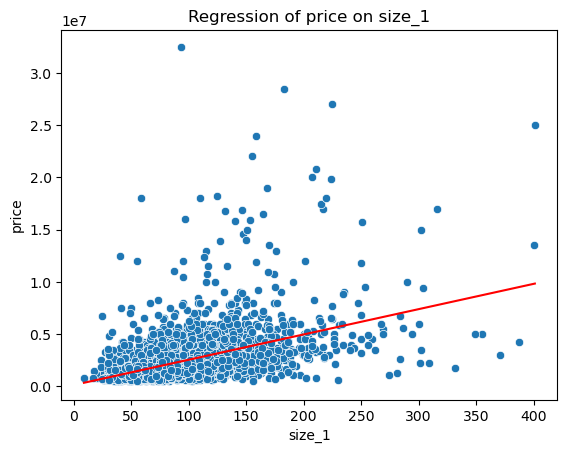

In [283]:
# Define the independent and dependent variables
X = analysis.data[['size_1']]
y = analysis.data['price']

# Fit the OLS model and print the summary
summary = analysis.OLS(X, y)
print(summary)

# Plot the data with the regression line
analysis.plot_regression(X, y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     624.3
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          2.29e-128
Time:                        17:10:47   Log-Likelihood:                -65194.
No. Observations:                4099   AIC:                         1.304e+05
Df Residuals:                    4097   BIC:                         1.304e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.819e+04   9.96e+04     -0.384      0.7

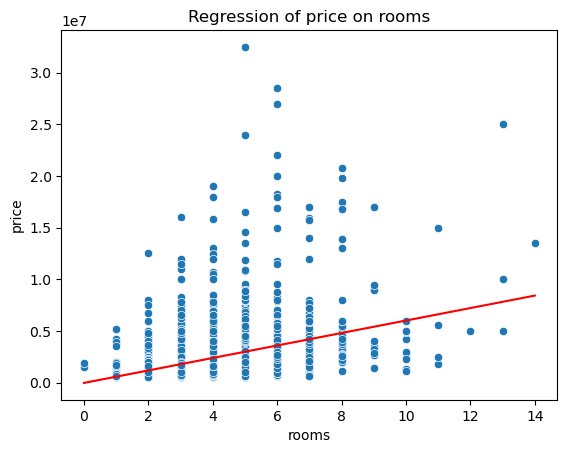

In [284]:
# Define the independent and dependent variables
X = analysis.data[['rooms']]
y = analysis.data['price']

# Fit the OLS model and print the summary
summary = analysis.OLS(X, y)
print(summary)

# Plot the data with the regression line
analysis.plot_regression(X, y)

# How does location affect the price?

**Mean price for each city

In [285]:
# Group the data by city and calculate the mean price
mean_prices_by_city = data.groupby('city')['price'].mean().reset_index()
mean_prices_by_city = mean_prices_by_city.sort_values('price', ascending=False).head(50)


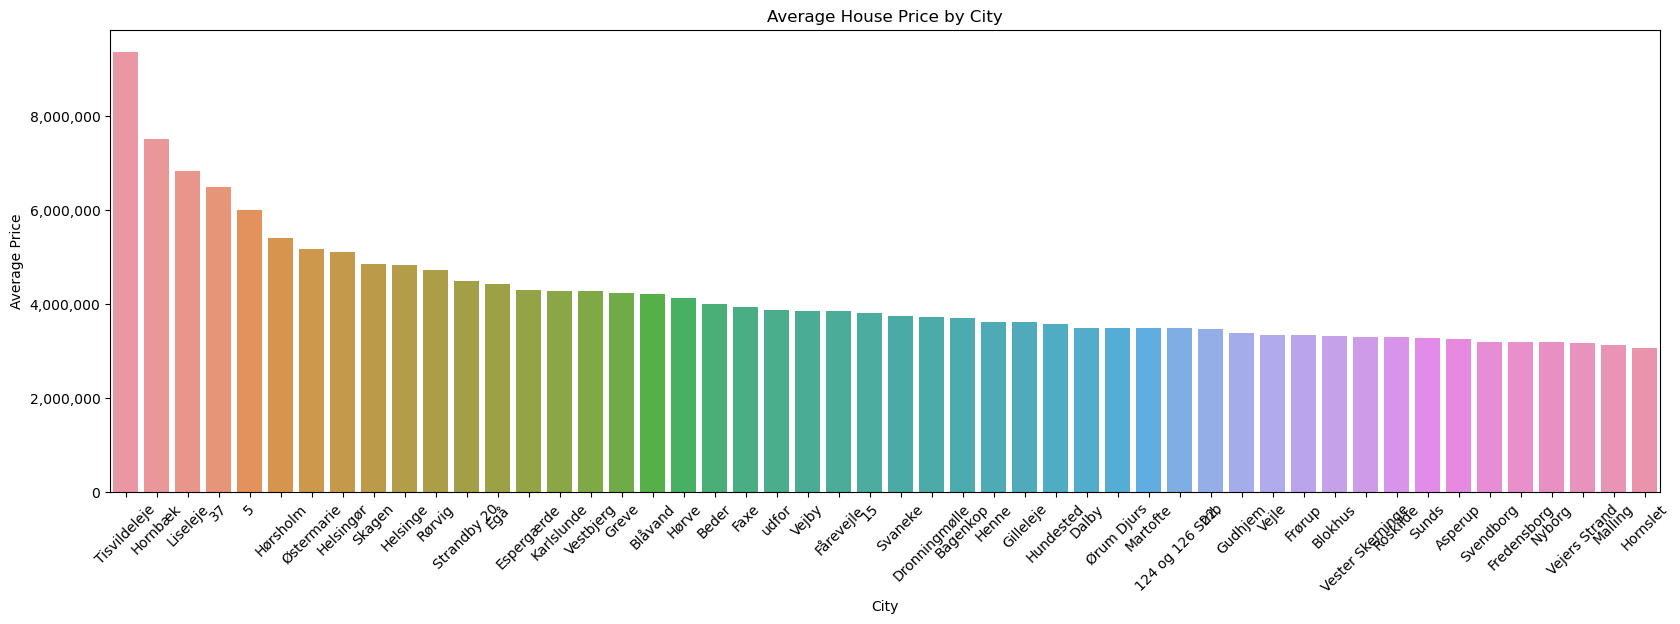

In [286]:
from matplotlib.ticker import FuncFormatter

def price_formatter(x, _):
    return f'{int(x):,}'

formatter = FuncFormatter(price_formatter)

plt.figure(figsize=(20, 6))
ax = sns.barplot(x='city', y='price', data=mean_prices_by_city)
plt.title('Average House Price by City')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.xlabel('City')

ax.yaxis.set_major_formatter(formatter)
plt.show()


**Mean price each postcode**

In [287]:
# Group the data by postcode and calculate the mean price

mean_prices_by_postcode = data.groupby('postcode')['price'].mean().reset_index()
mean_prices_by_postcode = mean_prices_by_postcode.sort_values('price', ascending=False).head(50)
mean_prices_by_postcode['price'] = mean_prices_by_postcode['price'].astype(int)
mean_prices_by_postcode['postcode'] = mean_prices_by_postcode['postcode'].astype(int)

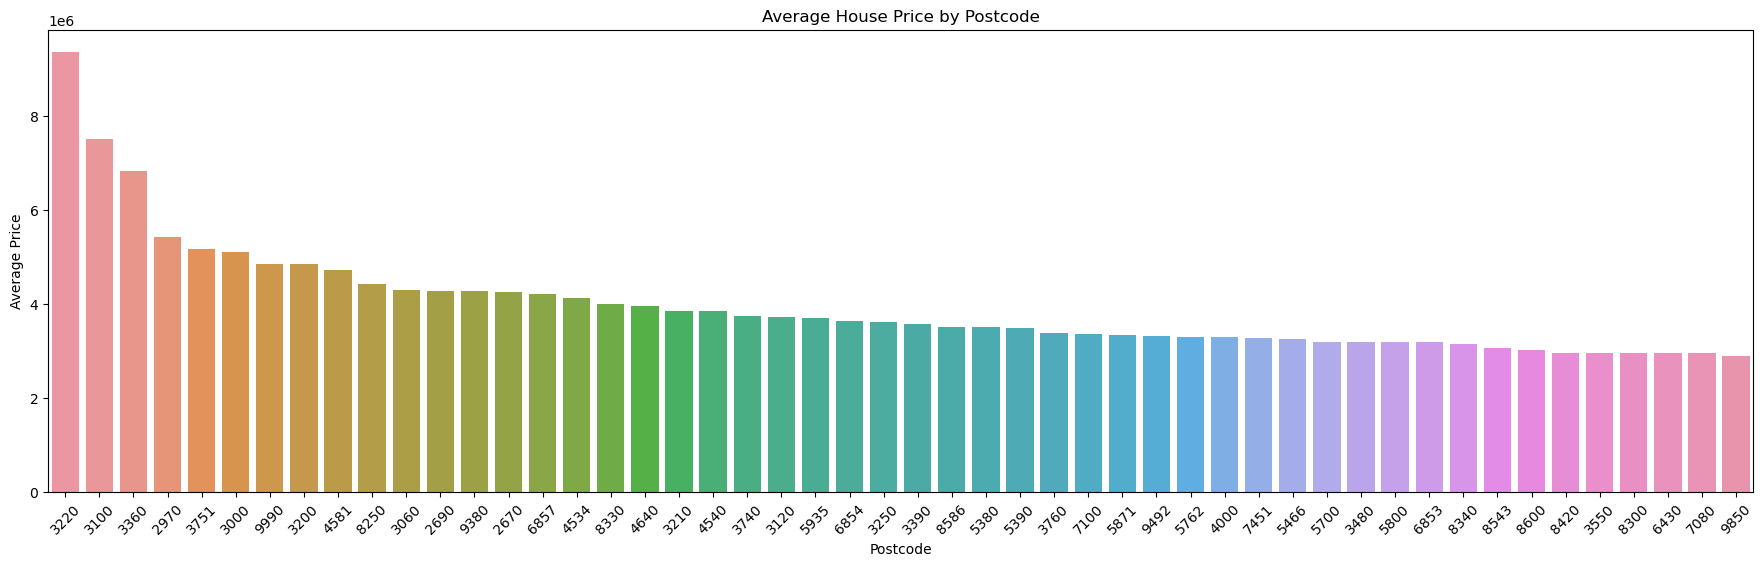

In [288]:
plt.figure(figsize=(22, 6))
sns.barplot(x='postcode', y='price', data=mean_prices_by_postcode, order=mean_prices_by_postcode['postcode'])
plt.title('Average House Price by Postcode')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.xlabel('Postcode')
plt.show()




# Comparing the highest and lowest price city: Hornbæk and Tarm

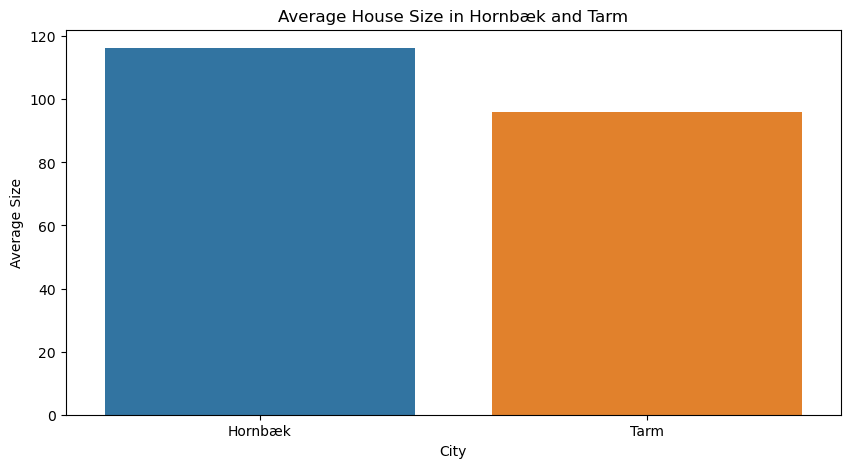

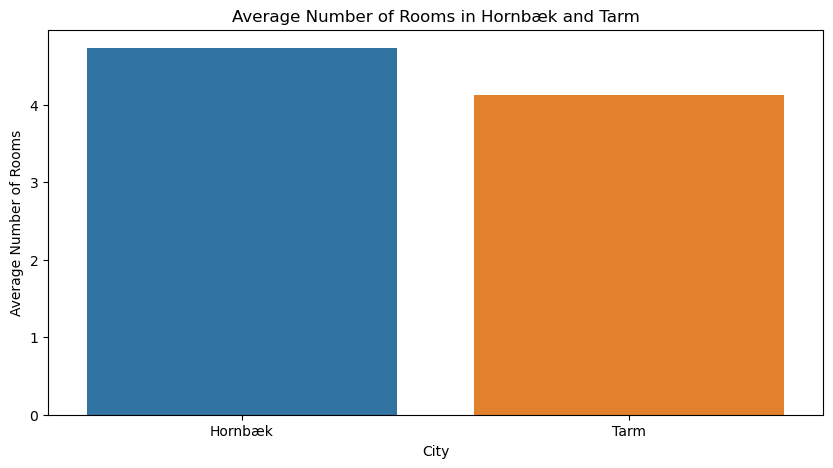

In [289]:
# Filter the dataset for Hornbæk and Tarm 
hornbæk_data = data[data['city'] == 'Hornbæk']
tarm_data = data[data['city'] == 'Tarm']


# Calculate the average size and number of rooms for houses in Hornbæk and Tarm
hornbæk_mean_size = hornbæk_data['size_1'].mean()
tarm_mean_size = tarm_data['size_1'].mean()

hornbæk_mean_rooms = hornbæk_data['rooms'].mean()
tarm_mean_rooms = tarm_data['rooms'].mean()

# Visualization
# Create bar charts to compare the average size and number of rooms between houses in Hornbæk and Tarm
# Average size comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=['Hornbæk', 'Tarm'], y=[hornbæk_mean_size, tarm_mean_size])
plt.title('Average House Size in Hornbæk and Tarm')
plt.ylabel('Average Size')
plt.xlabel('City')
plt.show()

# Average number of rooms comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=['Hornbæk', 'Tarm'], y=[hornbæk_mean_rooms, tarm_mean_rooms])
plt.title('Average Number of Rooms in Hornbæk and Tarm')
plt.ylabel('Average Number of Rooms')
plt.xlabel('City')
plt.show()

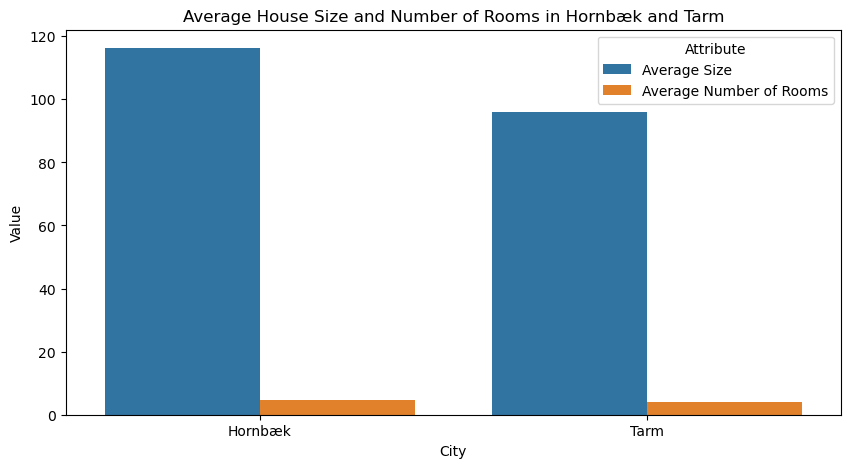

In [290]:
comparison_data = pd.DataFrame({
    'City': ['Hornbæk', 'Tarm'],
    'Average Size': [hornbæk_mean_size, tarm_mean_size],
    'Average Number of Rooms': [hornbæk_mean_rooms, tarm_mean_rooms]
})


melted_data = comparison_data.melt(id_vars='City', var_name='Attribute', value_name='Value')


plt.figure(figsize=(10, 5))
sns.barplot(x='City', y='Value', hue='Attribute', data=melted_data)
plt.title('Average House Size and Number of Rooms in Hornbæk and Tarm')
plt.ylabel('Value')
plt.xlabel('City')
plt.show()

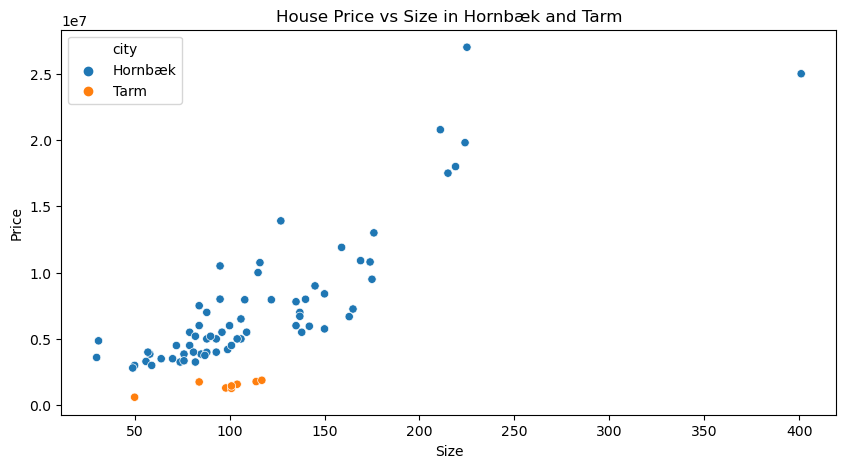

In [291]:
combined_data = pd.concat([hornbæk_data, tarm_data])
plt.figure(figsize=(10, 5))
sns.scatterplot(x='size_1', y='price', hue='city', data=combined_data)
plt.title('House Price vs Size in Hornbæk and Tarm')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()


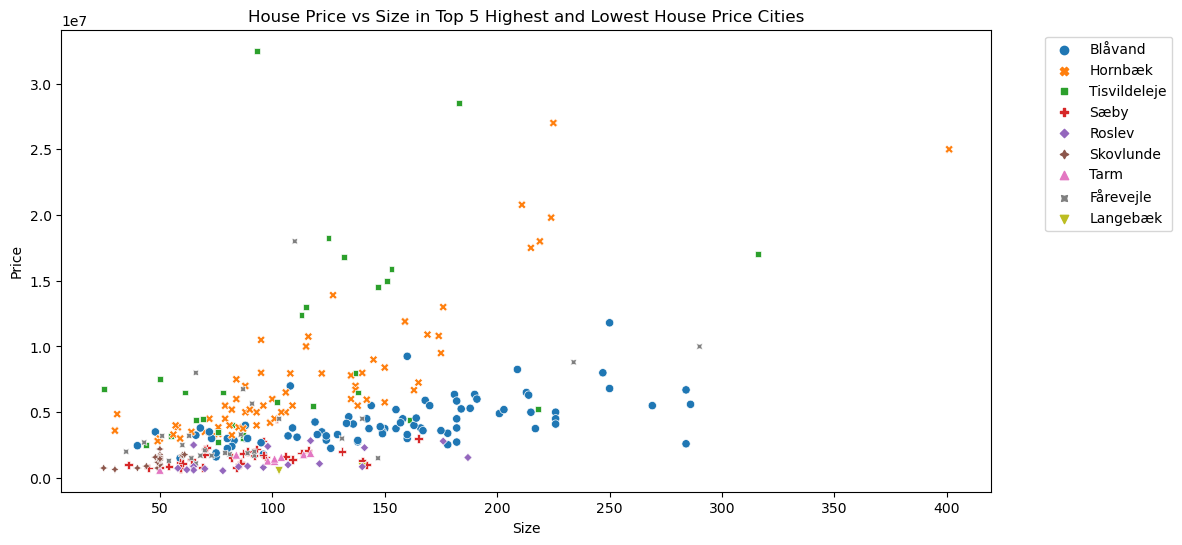

In [292]:
highest_price_cities = ['Hornbæk', 'Julesminde', 'Blåvand', 'Sæby', 'Tisvildeleje']
lowest_price_cities = ['Tarm', 'Roslev', 'Skovlunde', 'Langebæk', 'Fårevejle']

highest_data = data[data['city'].isin(highest_price_cities)]
lowest_data = data[data['city'].isin(lowest_price_cities)]

combined_highest_lowest_data = pd.concat([highest_data, lowest_data])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='size_1', y='price', hue='city', style='city', data=combined_highest_lowest_data)
plt.title('House Price vs Size in Top 5 Highest and Lowest House Price Cities')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

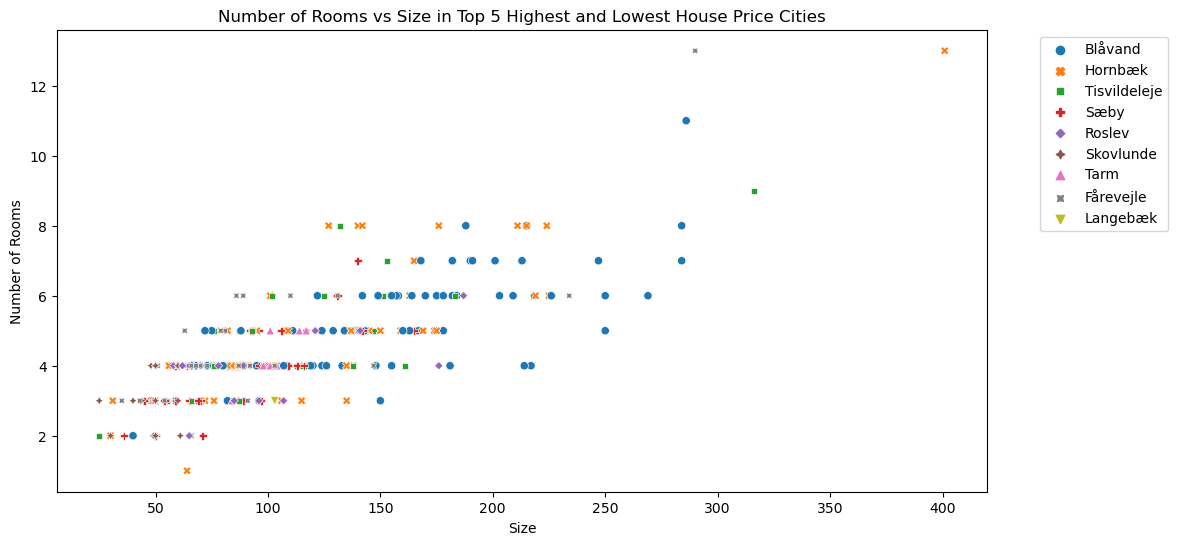

In [293]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='size_1', y='rooms', hue='city', style='city', data=combined_highest_lowest_data)
plt.title('Number of Rooms vs Size in Top 5 Highest and Lowest House Price Cities')
plt.xlabel('Size')
plt.ylabel('Number of Rooms')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()